In [2]:
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
filename = 'data_with_g'
url=r'{}.csv'.format(filename)
df = pd.read_csv(url)

In [4]:
df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.00,-2.19,3.54,7.89,8.93
1,0.00,-2.19,3.56,7.87,8.91
2,0.00,-2.19,3.58,7.84,8.89
3,0.01,-2.17,3.60,7.83,8.88
4,0.01,-2.14,3.61,7.83,8.89


In [76]:
df['SMV'] = df.apply(lambda row: np.sqrt(row['Acceleration x (m/s^2)']**2+
                                           row['Acceleration y (m/s^2)']**2+
                                           row['Acceleration z (m/s^2)']**2), axis=1)

In [79]:
df.head()

In [78]:
#to create 2 second window, separate each 1000 rows
list_chunks = []
for g, df in df.groupby(np.arange(len(df)) // 1000):
    list_chunks.append(df)

In [79]:
#create new df with feature names
feature_df = pd.DataFrame(columns = ['time(s)','x_max','x_min','x_avg',
                                     'y_max','y_min','y_avg','y_diff',
                                     'z_max','z_min','z_avg', 'smv_max','smv_min','smv_avg'])

In [80]:
for chunck in list_chunks:
#     chunk = chunk.drop('Unnamed: 0', axis=1)
    max_x = chunck['Acceleration x (m/s^2)'].max()
    min_x = chunck['Acceleration x (m/s^2)'].min()
    avg_x = chunck['Acceleration x (m/s^2)'].mean()
        
    max_y = chunck['Acceleration y (m/s^2)'].max()
    min_y = chunck['Acceleration y (m/s^2)'].min()
    avg_y = chunck['Acceleration y (m/s^2)'].mean()
    y_diff = abs(max_y-min_y)
    
    max_z = chunck['Acceleration z (m/s^2)'].max()
    min_z = chunck['Acceleration z (m/s^2)'].min()
    avg_z = chunck['Acceleration z (m/s^2)'].mean()
    
    max_smv = chunck['SMV'].max()
    min_smv = chunck['SMV'].min()
    avg_smv = chunck['SMV'].mean()
     
    time_s = chunck['Time (s)'].max()
    
    feature_df = feature_df.append({'time(s)': time_s,
                                    'x_max': max_x,
                                    'x_min': min_x,
                                    'x_avg': avg_x,
                                    'y_max': max_y,
                                    'y_min': min_y,
                                    'y_avg': avg_y,
                                    'y_diff' : y_diff,
                                    'z_max': max_z,
                                    'z_min': min_z,
                                    'z_avg': avg_z,
                                    'smv_max': max_smv,
                                    'smv_min': min_smv,
                                    'smv_avg':avg_smv},
                                     ignore_index=True)
    

In [81]:
feature_df.head()

,time(s),x_max,x_min,x_avg,y_max,y_min,y_avg,y_diff,z_max,z_min,z_avg,smv_max,smv_min,smv_avg
0,2.0,0.25,-2.68,-1.36510,5.08,0.04,2.77126,5.04,13.25,6.75,9.32075,13.374547,7.779666,9.927433
1,4.0,2.03,-2.18,0.03282,5.69,2.43,3.66023,3.26,10.58,7.74,9.25582,11.486444,8.817227,10.043078
2,6.0,1.71,-5.66,-1.13651,4.27,-0.76,2.05944,5.03,12.63,6.05,9.48482,12.909818,6.347433,10.038126
3,8.0,1.38,-1.78,-0.21420,5.33,1.73,3.10468,3.60,11.27,7.28,9.36129,11.582875,8.315011,9.946413
4,10.0,2.16,-1.31,0.60319,3.48,-0.85,1.86711,4.33,12.94,7.17,9.74263,13.026055,7.627372,10.028175


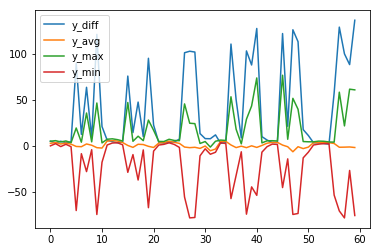

In [82]:
feature_df[['y_diff','y_avg','y_max','y_min']].plot()

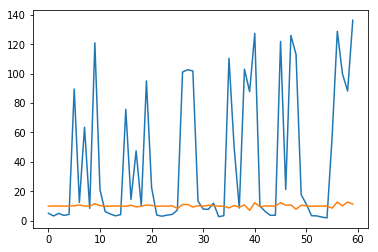

In [83]:
feature_df['y_diff'].plot()
feature_df['smv_avg'].plot()

In [93]:
# feature_df[feature_df['y_diff']>50].smv_avg.min()
#for testing purpose

7.0557954463030725

In [92]:
#how many rows has y_diff>50?
feature_df[feature_df['y_diff']>50].count()

time(s)    20
x_max      20
x_min      20
x_avg      20
y_max      20
y_min      20
y_avg      20
y_diff     20
z_max      20
z_min      20
z_avg      20
smv_max    20
smv_min    20
smv_avg    20
dtype: int64

In [64]:
th_y = 50

In [94]:
feature_df['label'] = feature_df.apply(lambda row: 1 if (row['y_diff']>= th_y) else 0, axis=1)

In [98]:
feature_df.query('label ==1').count()

time(s)    20
x_max      20
x_min      20
x_avg      20
y_max      20
y_min      20
y_avg      20
y_diff     20
z_max      20
z_min      20
z_avg      20
smv_max    20
smv_min    20
smv_avg    20
label      20
dtype: int64

In [ ]:
#save file to csv
feature_df.to_csv(r'fall_label_'+filename+'.csv')

In [ ]:
feature_df.head()